# Frequent category (mode) imputation 

**Definition**
  * Replacing missing values by a mode, or most frequent value in a variable
  * Suitable for numerical and categorical 

**Assumptions**
  * Data is missing at random 
  * The missing data most likely looks like the majority of the observations

**Advantages**
  * Easy and fast 

**Limitations**
  * Distortion of the distribution & covariance 
  * Over-representation of the most frequent label

**When to use**
  * When data is missing at random
  * no more than 5% of missing data 

# Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.model_selection import train_test_split 

from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('../data/house_price/train.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Explore data

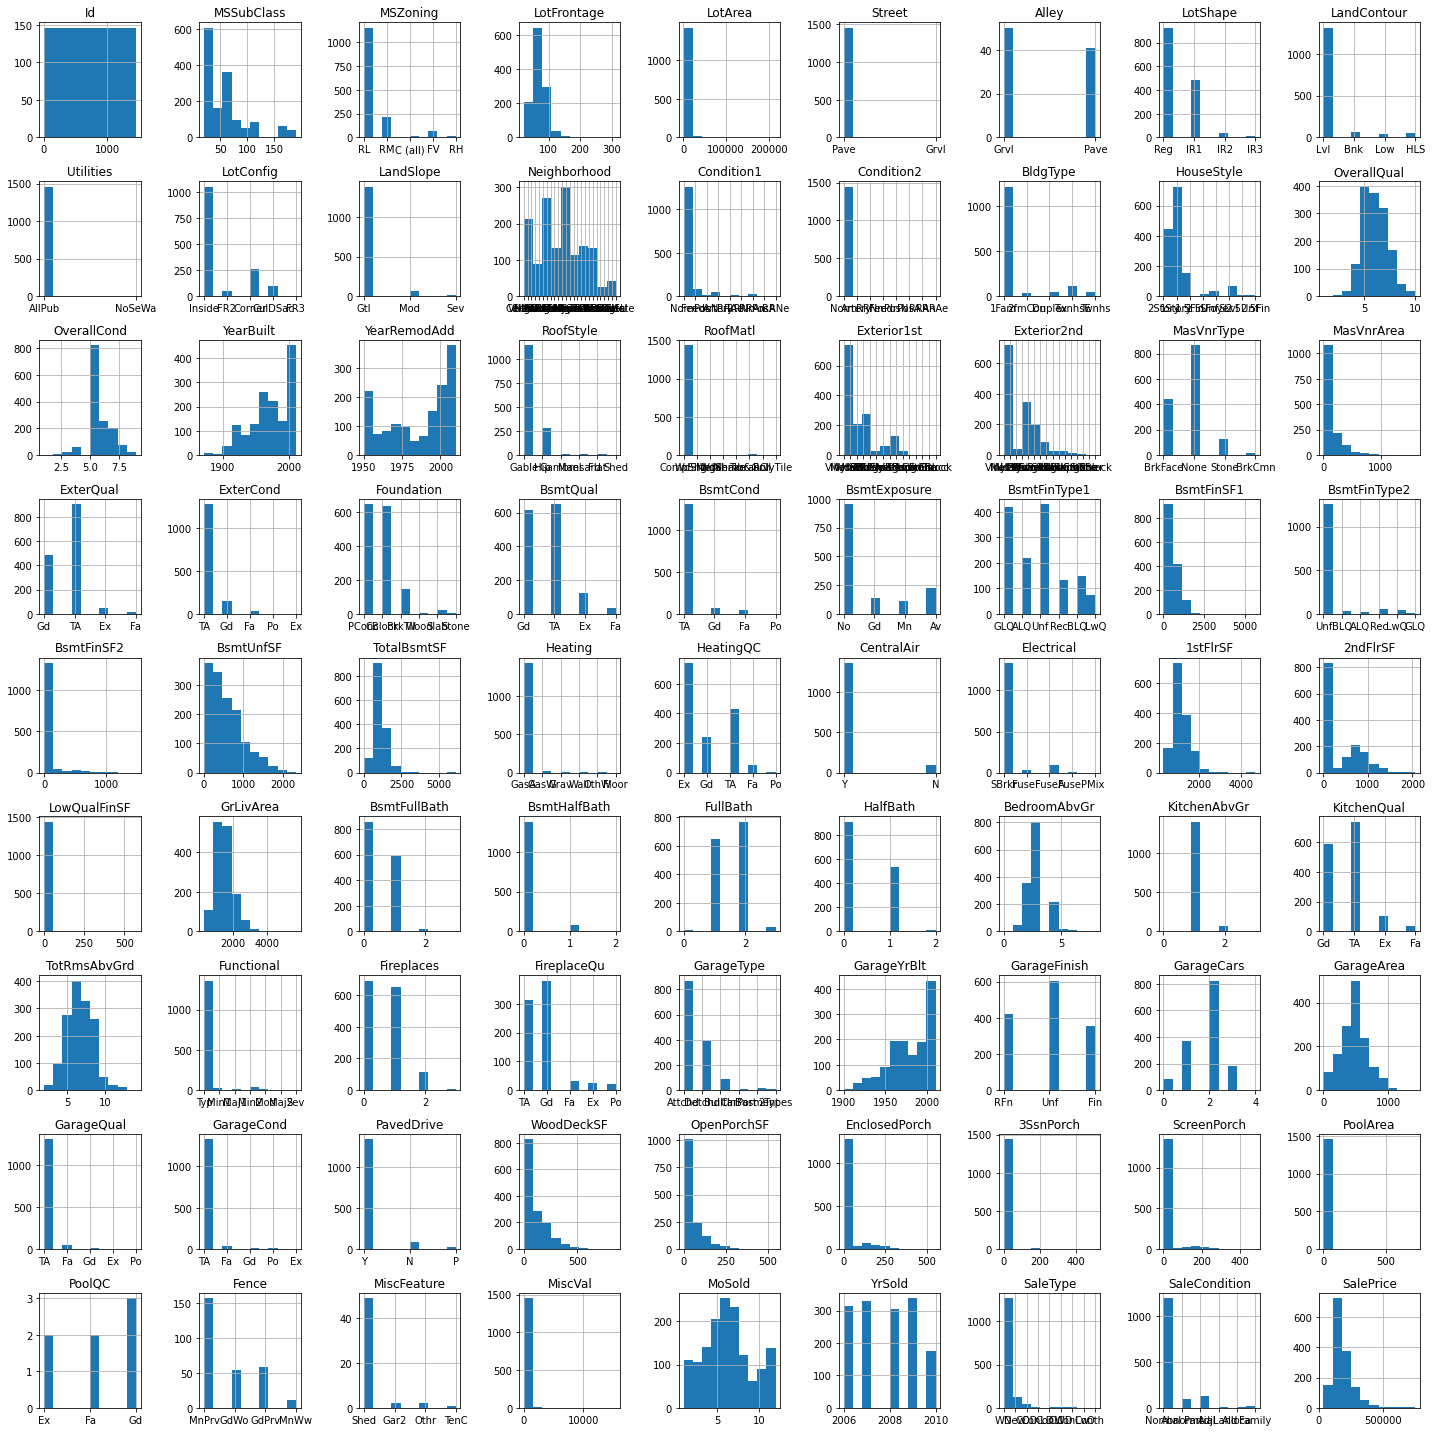

In [4]:
fig, ax = plt.subplots(9, 9, figsize=(20, 20))
for i, col in enumerate(df.columns):
    ax = plt.subplot(9, 9, i+1)
    df[col].hist()
    ax.set_title(col)
    
plt.tight_layout()
plt.show()

In [5]:
# categorical variables 
categorical = df.columns[df.dtypes=='O']
print(f"number of categorical variables: {len(categorical)}")
print(categorical)

number of categorical variables: 43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [6]:
# numerical variables 
numerical = df.select_dtypes(np.number).columns
print(f"number of numerical variables: {len(numerical)}")
numerical

number of numerical variables: 38


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [7]:
# select a few columns that have null
cat_null = categorical[df[categorical].isnull().mean() > 0]
cat_null

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [8]:
# select a few columns that have null
nun_null = numerical[df[numerical].isnull().mean() > 0]
nun_null

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [9]:
# check percentage of null data in numerical variables
df[nun_null].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

In [10]:
# check percentage of null data in categorical variables
df[cat_null].isnull().mean()

Alley           0.937671
MasVnrType      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

# Split data

In [11]:
cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 
        'BsmtQual', 'FireplaceQu', 'GarageQual', 'Alley']
cols_to_use = cols + ['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(df[cols], 
                                                    df['SalePrice'],
                                                   test_size=0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((1022, 7), (438, 7))

In [12]:
X_train.isnull().mean()

LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
BsmtQual       0.023483
FireplaceQu    0.467710
GarageQual     0.052838
Alley          0.939335
dtype: float64

# Pandas

In [13]:
# check most frequent values
for col in X_train.columns[X_train.dtypes=='O']:
    print(X_train[col].value_counts())
    print()

TA    463
Gd    430
Ex     82
Fa     23
Name: BsmtQual, dtype: int64

Gd    255
TA    229
Fa     26
Ex     18
Po     16
Name: FireplaceQu, dtype: int64

TA    919
Fa     35
Gd      9
Po      3
Ex      2
Name: GarageQual, dtype: int64

Pave    32
Grvl    30
Name: Alley, dtype: int64



In [14]:
# find the most frequent item in each column
X_train.mode()

,LotFrontage,MasVnrArea,GarageYrBlt,BsmtQual,FireplaceQu,GarageQual,Alley
0,60.0,0.0,2005.0,TA,Gd,TA,Pave


In [15]:
most_frequent_dict = X_train.mode().loc[0].to_dict()
most_frequent_dict

{'LotFrontage': 60.0,
 'MasVnrArea': 0.0,
 'GarageYrBlt': 2005.0,
 'BsmtQual': 'TA',
 'FireplaceQu': 'Gd',
 'GarageQual': 'TA',
 'Alley': 'Pave'}

In [16]:
X_train_imputed = X_train.fillna(most_frequent_dict)

In [17]:
# compare: original
X_train.head()

,LotFrontage,MasVnrArea,GarageYrBlt,BsmtQual,FireplaceQu,GarageQual,Alley
64,NaN,573.0,1998.0,Gd,NaN,TA,NaN
682,NaN,0.0,1996.0,Gd,Gd,TA,NaN
960,50.0,0.0,NaN,TA,NaN,NaN,NaN
1384,60.0,0.0,1939.0,TA,NaN,TA,NaN
1100,60.0,0.0,1930.0,TA,NaN,TA,NaN


In [18]:
# compare: after imputation
X_train_imputed.head()

,LotFrontage,MasVnrArea,GarageYrBlt,BsmtQual,FireplaceQu,GarageQual,Alley
64,60.0,573.0,1998.0,Gd,Gd,TA,Pave
682,60.0,0.0,1996.0,Gd,Gd,TA,Pave
960,50.0,0.0,2005.0,TA,Gd,TA,Pave
1384,60.0,0.0,1939.0,TA,Gd,TA,Pave
1100,60.0,0.0,1930.0,TA,Gd,TA,Pave


# SimpleImputer

In [19]:
imputer = SimpleImputer(strategy='most_frequent')

imputer.fit(X_train)

SimpleImputer(strategy='most_frequent')

In [20]:
X_train_imputed = imputer.transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

In [21]:
X_train.head()

,LotFrontage,MasVnrArea,GarageYrBlt,BsmtQual,FireplaceQu,GarageQual,Alley
64,NaN,573.0,1998.0,Gd,NaN,TA,NaN
682,NaN,0.0,1996.0,Gd,Gd,TA,NaN
960,50.0,0.0,NaN,TA,NaN,NaN,NaN
1384,60.0,0.0,1939.0,TA,NaN,TA,NaN
1100,60.0,0.0,1930.0,TA,NaN,TA,NaN


In [22]:
X_train_imputed.head()

,LotFrontage,MasVnrArea,GarageYrBlt,BsmtQual,FireplaceQu,GarageQual,Alley
0,60,573,1998,Gd,Gd,TA,Pave
1,60,0,1996,Gd,Gd,TA,Pave
2,50,0,2005,TA,Gd,TA,Pave
3,60,0,1939,TA,Gd,TA,Pave
4,60,0,1930,TA,Gd,TA,Pave


# Different imputation for different features

In [23]:
numeric_cols = X_train[X_train.columns[X_train.dtypes !='O']].columns
categoric_cols = X_train[X_train.columns[X_train.dtypes =='O']].columns

In [24]:
print("numeric columns:", numeric_cols)
print("categorical columns:", categoric_cols)

numeric columns: Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')
categorical columns: Index(['BsmtQual', 'FireplaceQu', 'GarageQual', 'Alley'], dtype='object')


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 

transformer = ColumnTransformer(
    transformers=[
        ('mean_imputer', SimpleImputer(strategy='mean'), numeric_cols),
        ('frequent_imputer', SimpleImputer(strategy='most_frequent'), categoric_cols)
    ])

transformer.fit(X_train)

ColumnTransformer(transformers=[('mean_imputer', SimpleImputer(),
                                 Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')),
                                ('frequent_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 Index(['BsmtQual', 'FireplaceQu', 'GarageQual', 'Alley'], dtype='object'))])

In [26]:
X_train_imputed = transformer.transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

In [27]:
X_train_imputed

,LotFrontage,MasVnrArea,GarageYrBlt,BsmtQual,FireplaceQu,GarageQual,Alley
0,69.6687,573,1998,Gd,Gd,TA,Pave
1,69.6687,0,1996,Gd,Gd,TA,Pave
2,50,0,1978.01,TA,Gd,TA,Pave
3,60,0,1939,TA,Gd,TA,Pave
4,60,0,1930,TA,Gd,TA,Pave
...,...,...,...,...,...,...,...
1017,82,673,1999,Gd,Gd,TA,Pave
1018,60,0,1996,Gd,Gd,TA,Pave
1019,68,0,1978,TA,Gd,TA,Pave
1020,69.6687,18,2003,Gd,TA,TA,Pave
